In [6]:
###### libs

#### Import the packages
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

sns.set_style('whitegrid')
%matplotlib inline



In [7]:
s = """
<h2>Distribution of Player's birthday by Month</h2>
"""



In [8]:
#### scrape each team page for the player's birthdays

team_list = ['ducks', 'coyotes','flames', 'oilers','kings', 'sharks', 'canucks', 'blackhawks'
                ,'avalanche', 'stars', 'wild', 'predators', 'blues', 'jets', 'bruins', 'sabres', 'redwings'
                , 'panthers', 'canadiens', 'senators', 'lightning', 'mapleleafs', 'hurricanes', 'bluejackets'
                ,'devils', 'islanders', 'rangers', 'flyers', 'penguins', 'capitals']

#### set-up empty lists for the birthdays and birth locations
list_of_birthdays = []
list_of_birthlocation = []

### start the loop
i = 0
for x in team_list:
    optionsUrl = 'http://' + team_list[i] + '.nhl.com/club/roster.htm'
    optionsPage = urlopen(optionsUrl)

    soup = BeautifulSoup(optionsPage)
    birthdays = soup.find_all('td',{"class": "left", "width": "20%"})
    place_of_birth = soup.find_all('td',{"class": "left", "width": "30%"})

    ### append to the birthday list
    for x in birthdays:
        x = x.get_text()
        if x.find(',') != -1 or x.find('19') != -1: ### some birthdays don't have commas
            list_of_birthdays.append(x)
        else:
            pass
        
    ### append to the birth location list
    for y in place_of_birth:
        y = y.get_text()
        if y.find(',') != -1:
            list_of_birthlocation.append(y)
        else:
            pass
        
    i += 1
    

In [9]:
#### formatting
dataframe_of_birthdays = pd.DataFrame(list_of_birthdays)  
dataframe_of_birthdays.columns = ['birthday']
dataframe_of_birthdays['birthday'] = pd.to_datetime(dataframe_of_birthdays['birthday'])
dataframe_of_birthdays['month_of_birthday'] = dataframe_of_birthdays['birthday'].map(lambda x: x.month)

#### attaching the birth location
dataframe_of_birthdays['birth_location'] = list_of_birthlocation
#### figure out if the person was born in canada
dataframe_of_birthdays['born_in_canada'] = np.where(dataframe_of_birthdays['birth_location'].str[-3:]=='CAN', 1, 0)

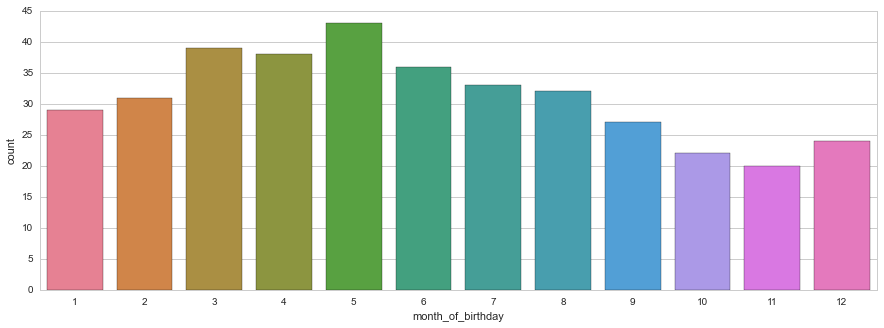

In [12]:
h = HTML(s); 
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='month_of_birthday', data=dataframe_of_birthdays[dataframe_of_birthdays['born_in_canada'] == 1], order = range(1,13), palette="husl", ax=axis1)
h